In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

In [2]:
df = pd.read_csv("cashback_cleaned.csv")

In [3]:
pd.set_option('display.max_columns', None) # чтобы видеть все столбцы при выводе таблицы

In [4]:
df.loc[:, ['act_pharmacy', 'act_restaurants',
       'act_clothes', 'act_car_service', 'act_supermarkets', 'act_taxi',
       'act_beauty', 'act_entertainment', 'act_railway', 'act_education',
       'act_house', 'act_sports_goods', 'act_pets', 'act_flowers',
       'act_fastfood', 'act_carsharing', 'act_rent_car']].sum(axis=1)

0        3
1        3
2        3
3        3
4        2
        ..
54997    0
54998    3
54999    2
55000    2
55001    2
Length: 55002, dtype: int64

In [5]:
df

,client_id,region,city,age,sex,month,total,total_cashback,pharmacy,restaurants,clothes,car_service,supermarkets,taxi,beauty,entertainment,railway,education,house,sports_goods,pets,flowers,fastfood,carsharing,rent_car,act_pharmacy,act_restaurants,act_clothes,act_car_service,act_supermarkets,act_taxi,act_beauty,act_entertainment,act_railway,act_education,act_house,act_sports_goods,act_pets,act_flowers,act_fastfood,act_carsharing,act_rent_car,back_pharmacy,back_restaurants,back_clothes,back_car_service,back_supermarkets,back_taxi,back_beauty,back_entertainment,back_railway,back_education,back_house,back_sports_goods,back_pets,back_flowers,back_fastfood,back_carsharing,back_rent_car
0,1889,Москва,Москва,50,M,2023-04-01,769455,21186,18993,99900,3294,0,397450,86037,96570,27420,0,0,9112,2100,0,660,27919,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,864,486,0,0,19836,0,0,0,0,0,0,0,0,0,0,0,0
1,1889,Москва,Москва,50,M,2023-05-01,817209,16161,37807,92424,0,6750,219394,109221,80520,76950,0,0,63936,5550,37147,0,87510,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1884,0,0,0,10614,0,3663,0,0,0,0,0,0,0,0,0,0
2,1889,Москва,Москва,50,M,2023-06-01,1059606,24009,20791,124800,51246,67490,479201,100395,66165,113100,0,0,16413,4215,8122,0,7668,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,21,2025,0,0,21963,0,0,0,0,0,0,0,0,0,0,0,0
3,1889,Москва,Москва,50,M,2023-07-01,1158324,28086,131129,18060,78120,2400,532117,63909,59280,0,0,0,240492,0,18297,0,14520,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6033,0,0,0,22053,0,0,0,0,0,0,0,0,0,0,0,0
4,1889,Москва,Москва,50,M,2023-08-01,1104241,22584,44096,198480,19080,147705,286070,69279,178920,0,0,0,58884,13200,0,0,88527,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13491,0,9093,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54997,1005319581,Москва,Москва,37,NaN,2023-05-01,174758,0,657,54375,0,0,42113,46719,0,6000,0,0,0,0,0,0,24894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54998,1005319581,Москва,Москва,37,NaN,2023-06-01,273375,5634,0,128070,0,0,37164,86751,1800,5400,0,0,0,0,0,0,14190,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,5364,0,0,0,0,0,270,0,0,0,0,0,0,0,0,0
54999,1005319581,Москва,Москва,37,NaN,2023-07-01,168676,2907,5919,26085,0,0,32419,31272,0,27300,2700,0,2997,0,0,0,39984,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1542,0,1365,0,0,0,0,0,0,0,0,0
55000,1005319581,Москва,Москва,37,NaN,2023-08-01,205576,2427,1705,111690,0,0,16539,47529,1950,2778,0,0,0,0,0,0,23385,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,2343,0,0,0,0,0,0,0,0,0,0,0


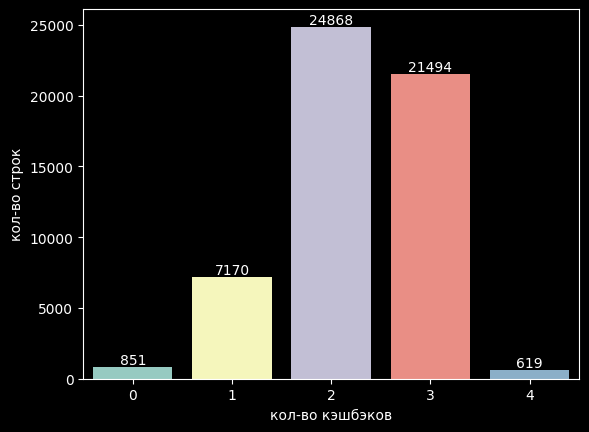

In [6]:
num_of_activations = df.loc[:, 'act_pharmacy':'act_rent_car']
sum_of_act = num_of_activations.sum(axis=1)
labels = [0, 1, 2, 3, 4]
data = []
for i in range(5):
    data.append(sum_of_act.loc[sum_of_act == i].count())
    
plt.style.use("dark_background")
plt.tight_layout()

ser = pd.Series(data, index=labels)
ser = ser.to_frame()

barSet = sns.barplot(x=ser.index, y=ser[0], data=ser, errorbar=None)
barSet.set(xlabel='кол-во кэшбэков', ylabel='кол-во строк')
barSet.bar_label(barSet.containers[0])
plt.savefig("кэшбэк.svg")
plt.show()

In [7]:
category_list = ['pharmacy', 'restaurants',
       'clothes', 'car_service', 'supermarkets', 'taxi',
       'beauty', 'entertainment', 'railway', 'education',
       'house', 'sports_goods', 'pets', 'flowers',
       'fastfood', 'carsharing', 'rent_car']

In [8]:
category_dfs = []

In [9]:
for category in category_list:
    category_dfs.append(df.loc[:, [total, category, 'act_' + category]]) # вероятно, что нам не понадобится добавлять величину кэшбэка

NameError: name 'total' is not defined

In [10]:
df.isnull().sum()

client_id              0
region                 0
city                   0
age                    0
sex                   96
month                  0
total                  0
total_cashback         0
pharmacy               0
restaurants            0
clothes                0
car_service            0
supermarkets           0
taxi                   0
beauty                 0
entertainment          0
railway                0
education              0
house                  0
sports_goods           0
pets                   0
flowers                0
fastfood               0
carsharing             0
rent_car               0
act_pharmacy           0
act_restaurants        0
act_clothes            0
act_car_service        0
act_supermarkets       0
act_taxi               0
act_beauty             0
act_entertainment      0
act_railway            0
act_education          0
act_house              0
act_sports_goods       0
act_pets               0
act_flowers            0
act_fastfood           0


Узнать то, насколько менялся выбор кэшбэка от месяца к месяцу

In [11]:
df1 = df.groupby('client_id')[['act_pharmacy', 'act_restaurants',
       'act_clothes', 'act_car_service', 'act_supermarkets', 'act_taxi',
       'act_beauty', 'act_entertainment', 'act_railway', 'act_education',
       'act_house', 'act_sports_goods', 'act_pets', 'act_flowers',
       'act_fastfood', 'act_carsharing', 'act_rent_car']].sum()

In [12]:
df1

,act_pharmacy,act_restaurants,act_clothes,act_car_service,act_supermarkets,act_taxi,act_beauty,act_entertainment,act_railway,act_education,act_house,act_sports_goods,act_pets,act_flowers,act_fastfood,act_carsharing,act_rent_car
client_id,,,,,,,,,,,,,,,,,
1889,4,3,0,0,6,0,3,0,0,0,1,0,0,0,0,0,0
2213,2,1,2,0,4,0,0,1,1,2,0,0,1,0,0,0,0
191765,1,1,3,2,1,0,1,0,1,0,0,0,4,0,0,0,0
256820,5,0,2,2,1,0,5,1,0,0,0,0,0,2,0,0,0
282534,3,3,3,0,0,0,5,0,0,0,0,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002982745,4,0,2,0,0,0,1,0,0,0,0,0,0,2,0,0,0
1002997975,4,0,1,0,0,1,0,4,2,0,0,0,0,0,0,0,0
1003172384,3,2,1,1,0,0,0,2,0,0,0,0,1,0,0,0,0


In [13]:
actCols = df1.columns
data = []
data1 = []

In [14]:
actCols

Index(['act_pharmacy', 'act_restaurants', 'act_clothes', 'act_car_service',
       'act_supermarkets', 'act_taxi', 'act_beauty', 'act_entertainment',
       'act_railway', 'act_education', 'act_house', 'act_sports_goods',
       'act_pets', 'act_flowers', 'act_fastfood', 'act_carsharing',
       'act_rent_car'],
      dtype='object')

In [15]:
for i in range(17):
  data.append(df1.iloc[:, i].loc[(2 <= df1.iloc[:, i]) & (df1.iloc[:, i] <= 4)].count())
  data1.append(df1.iloc[:, i].loc[(2 <= df1.iloc[:, i]) & (df1.iloc[:, i] <= 4)].index)
data1

[Int64Index([      1889,       2213,     282534,     283148,     331214,
                 405465,     861276,     935564,    1015614,    1041833,
             ...
             1002531915, 1002546432, 1002596705, 1002607234, 1002620484,
             1002982745, 1002997975, 1003172384, 1003493065, 1005319581],
            dtype='int64', name='client_id', length=4589),
 Int64Index([      1889,     282534,     283148,     286878,     582257,
                 941567,     969180,     983133,    1015614,    1041833,
             ...
              998432560,  999894498,  999916737,  999927292, 1000436510,
             1002527558, 1002596705, 1002620484, 1003172384, 1005319581],
            dtype='int64', name='client_id', length=3954),
 Int64Index([      2213,     191765,     256820,     282534,     283148,
                 286878,     378992,     582257,     861276,    1015614,
             ...
              999210143,  999927292, 1000325361, 1000364011, 1000436510,
             1000552110, 1

In [16]:
actSer = pd.Series(data, index=actCols)
actSer.sort_values(ascending=False, inplace=True)

In [17]:
actSer = actSer.to_frame()

In [18]:
actSer

,0
act_pharmacy,4589
act_restaurants,3954
act_clothes,3734
act_entertainment,3465
act_beauty,2886
act_car_service,1767
act_railway,1434
act_supermarkets,1434
act_taxi,1415
act_sports_goods,1261


In [19]:
plt.style.use("dark_background")
cols = ['gold'] * 13 + ['white'] * 4

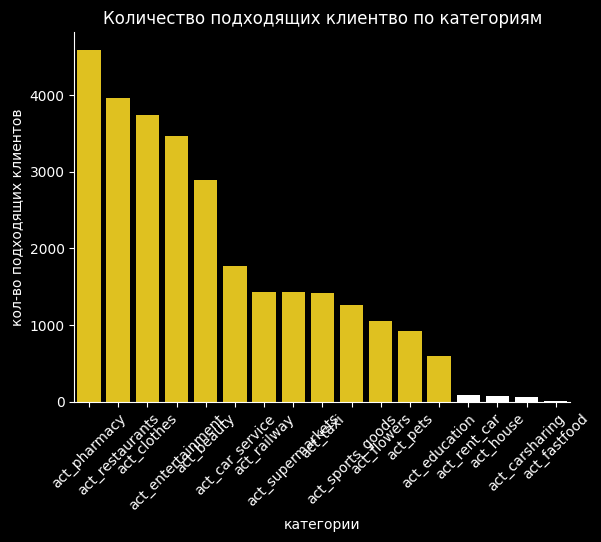

In [20]:
bars = sns.barplot(x=actSer.index, y=actSer[0], data=actSer, errorbar=None, palette=cols)
bars.set(xlabel='категории', ylabel='кол-во подходящих клиентов', title='Количество подходящих клиентво по категориям')
bars.tick_params(axis='x', rotation=45)
sns.despine()
plt.savefig("correct clients.svg")
plt.show()

In [21]:
data1

[Int64Index([      1889,       2213,     282534,     283148,     331214,
                 405465,     861276,     935564,    1015614,    1041833,
             ...
             1002531915, 1002546432, 1002596705, 1002607234, 1002620484,
             1002982745, 1002997975, 1003172384, 1003493065, 1005319581],
            dtype='int64', name='client_id', length=4589),
 Int64Index([      1889,     282534,     283148,     286878,     582257,
                 941567,     969180,     983133,    1015614,    1041833,
             ...
              998432560,  999894498,  999916737,  999927292, 1000436510,
             1002527558, 1002596705, 1002620484, 1003172384, 1005319581],
            dtype='int64', name='client_id', length=3954),
 Int64Index([      2213,     191765,     256820,     282534,     283148,
                 286878,     378992,     582257,     861276,    1015614,
             ...
              999210143,  999927292, 1000325361, 1000364011, 1000436510,
             1000552110, 1

In [22]:
actCols = df1.columns
actCols

Index(['act_pharmacy', 'act_restaurants', 'act_clothes', 'act_car_service',
       'act_supermarkets', 'act_taxi', 'act_beauty', 'act_entertainment',
       'act_railway', 'act_education', 'act_house', 'act_sports_goods',
       'act_pets', 'act_flowers', 'act_fastfood', 'act_carsharing',
       'act_rent_car'],
      dtype='object')

In [23]:
payment = ['pharmacy', 'restaurants', 'clothes', 'car_service',
       'supermarkets', 'taxi', 'beauty', 'entertainment', 'railway',
       'education', 'house', 'sports_goods', 'pets', 'flowers', 'fastfood',
       'carsharing', 'rent_car']

In [24]:
mechanism = []
for i in range(17):
    if (len(data1[i]) >= 500):
        mechList = []
        category = df.loc[df['client_id'].isin(data1[i])]
        for j in range(0, len(category), 6):
            client = category.iloc[j:j + 6]
            active = client.loc[client[actCols[i]] == 1]
            notActive = client.loc[client[actCols[i]] == 0]
            active = active.loc[active['total'] > 0]
            notActive = notActive.loc[notActive['total'] > 0]
            activeCoeff = (active[payment[i]] / active['total']).mean()
            notActiveCoeff = (notActive[payment[i]] / notActive['total']).mean()
            if notActiveCoeff != 0:
                coeff = activeCoeff / notActiveCoeff
                mechList.append(coeff)
        mechSer = pd.Series(data=mechList, name=payment[i])
        mechanism.append(mechSer)
mechanism

[0       1.026454
 1       0.000000
 2       3.271353
 3       0.590886
 4       0.678340
           ...   
 4381    0.906808
 4382    0.301146
 4383    0.768132
 4384    2.703091
 4385    1.144122
 Name: pharmacy, Length: 4386, dtype: float64,
 0        0.585568
 1        2.741283
 2       13.537060
 3       26.669768
 4        0.900837
           ...    
 3816     1.107746
 3817     1.928051
 3818     1.366555
 3819     1.122497
 3820     1.185167
 Name: restaurants, Length: 3821, dtype: float64,
 0        4.452682
 1        0.139848
 2        2.122071
 3        0.733569
 4       21.405476
           ...    
 3372     0.836120
 3373     2.056524
 3374     4.646190
 3375    13.071826
 3376     6.270932
 Name: clothes, Length: 3377, dtype: float64,
 0        5.282662
 1        7.018721
 2       10.316118
 3        2.983045
 4        1.157443
           ...    
 1674     8.460630
 1675     0.619355
 1676     0.336688
 1677     1.506400
 1678     2.473608
 Name: car_service, Length: 1679

In [25]:
def z_scores(mech):
    return abs((mech - mech.mean()) / mech.std())

In [26]:
z = []
for mech in mechanism:
    z.append(z_scores(mech))
correct_mech = []

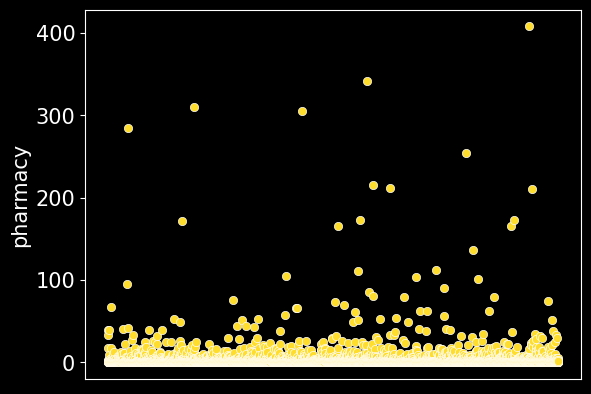

In [27]:
rc = {'font.size' : 15}
plt.rcParams.update(rc)
sns.scatterplot(data=mechanism[0], color='#FFDD2D')
plt.xticks([])
plt.savefig('pharmacyBefore.svg')
plt.show()

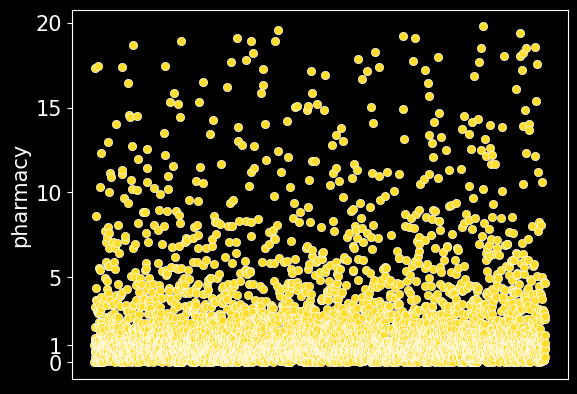

In [28]:
pharmMech = mechanism[0][z[0] <= 1]
sns.scatterplot(data=pharmMech, color='#FFDD2D')
plt.xticks([])
plt.yticks([0, 1, 5, 10, 15, 20])
plt.savefig('PharmacyAfter.svg')
plt.show()

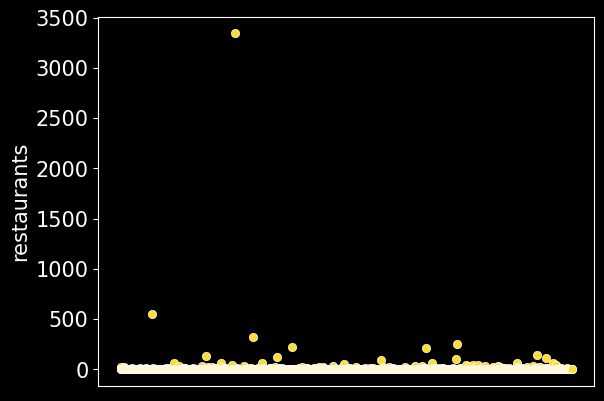

In [29]:
sns.scatterplot(data=mechanism[1], color='#FFDD2D')
plt.xticks([])
plt.savefig('restaurantsBefore.svg')
plt.show()

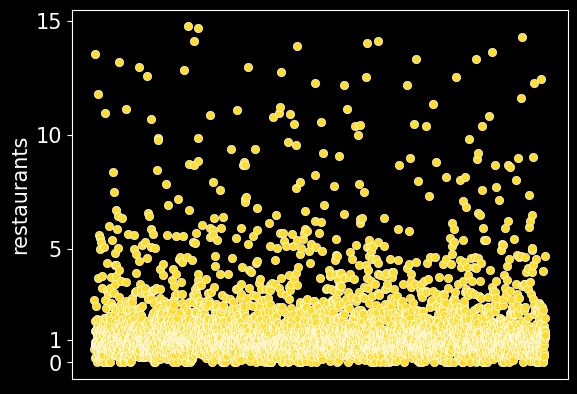

In [30]:
restMech = mechanism[1][z[1] <= 0.2]
sns.scatterplot(data=restMech, color='#FFDD2D')
plt.xticks([])
plt.yticks([0, 1, 5, 10, 15])
plt.savefig('restaurantsAfter.svg')
plt.show()

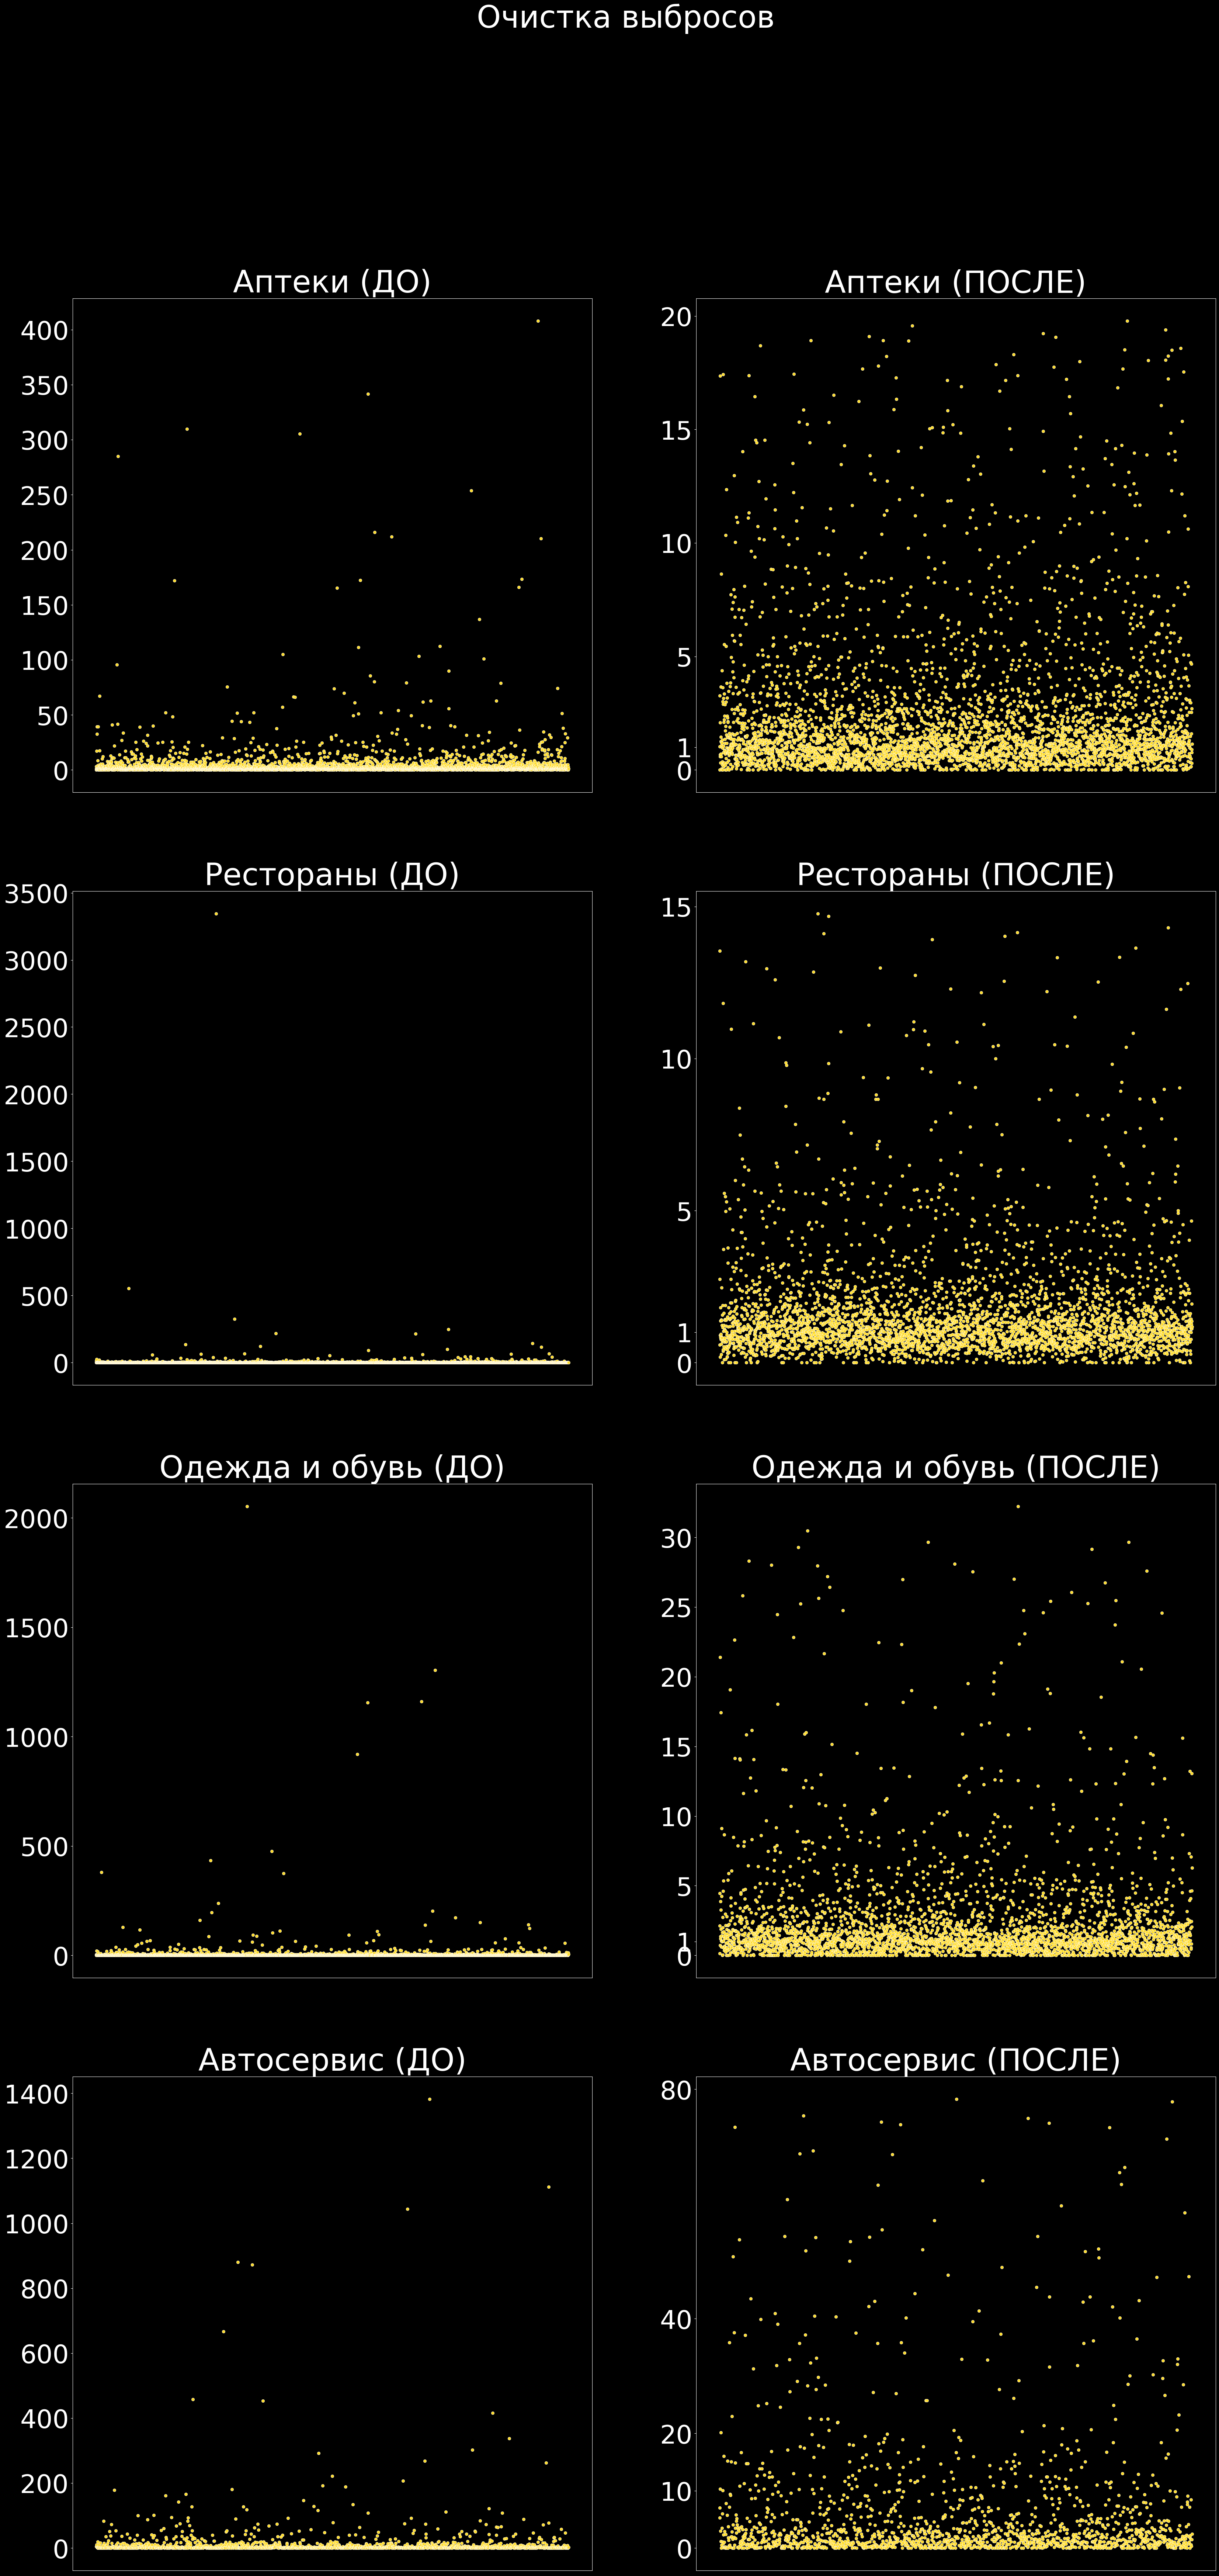

In [34]:
fig, axes = plt.subplots(4, 2, figsize=(40, 80))
rc = {'font.size' : 50}
plt.rcParams.update(rc)
fig.suptitle('Очистка выбросов')


pharmMech = mechanism[0][z[0] <= 1]
sns.scatterplot(ax=axes[0, 0], data=mechanism[0], color='#FFDD2D')
axes[0, 0].set_title('Аптеки (ДО)')
axes[0, 0].set_xticks([])
axes[0, 0].set_ylabel('')


sns.scatterplot(ax=axes[0, 1], data=pharmMech, color='#FFDD2D')
axes[0, 1].set_title('Аптеки (ПОСЛЕ)')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([0, 1, 5, 10, 15, 20])
axes[0, 1].set_ylabel('')



restMech = mechanism[1][z[1] <= 0.2]
sns.scatterplot(ax=axes[1, 0], data=mechanism[1], color='#FFDD2D')
axes[1, 0].set_xticks([])
axes[1, 0].set_title('Рестораны (ДО)')
axes[1, 0].set_ylabel('')


sns.scatterplot(ax=axes[1, 1], data=restMech, color='#FFDD2D')
axes[1, 1].set_title('Рестораны (ПОСЛЕ)')
axes[1, 1].set_yticks([0, 1, 5, 10, 15])
axes[1, 1].set_xticks([])
axes[1, 1].set_ylabel('')


clothMech = mechanism[2][z[2] <= 0.5]
sns.scatterplot(ax=axes[2, 0], data=mechanism[2], color='#FFDD2D')
axes[2, 0].set_xticks([])
axes[2, 0].set_title('Одежда и обувь (ДО)')
axes[2, 0].set_ylabel('')


sns.scatterplot(ax=axes[2, 1], data=clothMech, color='#FFDD2D')
axes[2, 1].set_title('Одежда и обувь (ПОСЛЕ)')
axes[2, 1].set_yticks([0, 1, 5, 10, 15, 20, 25, 30])
axes[2, 1].set_xticks([])
axes[2, 1].set_ylabel('')


car_serviceMech = mechanism[3][z[3] <= 1]
sns.scatterplot(ax=axes[3, 0], data=mechanism[3], color='#FFDD2D')
axes[3, 0].set_xticks([])
axes[3, 0].set_title('Автосервис (ДО)')
axes[3, 0].set_ylabel('')


sns.scatterplot(ax=axes[3, 1], data=car_serviceMech, color='#FFDD2D')
axes[3, 1].set_title('Автосервис (ПОСЛЕ)')
axes[3, 1].set_yticks([0, 10, 20, 40, 80])
axes[3, 1].set_xticks([])
axes[3, 1].set_ylabel('')
plt.show()
plt.close(fig)

0.977433628318584


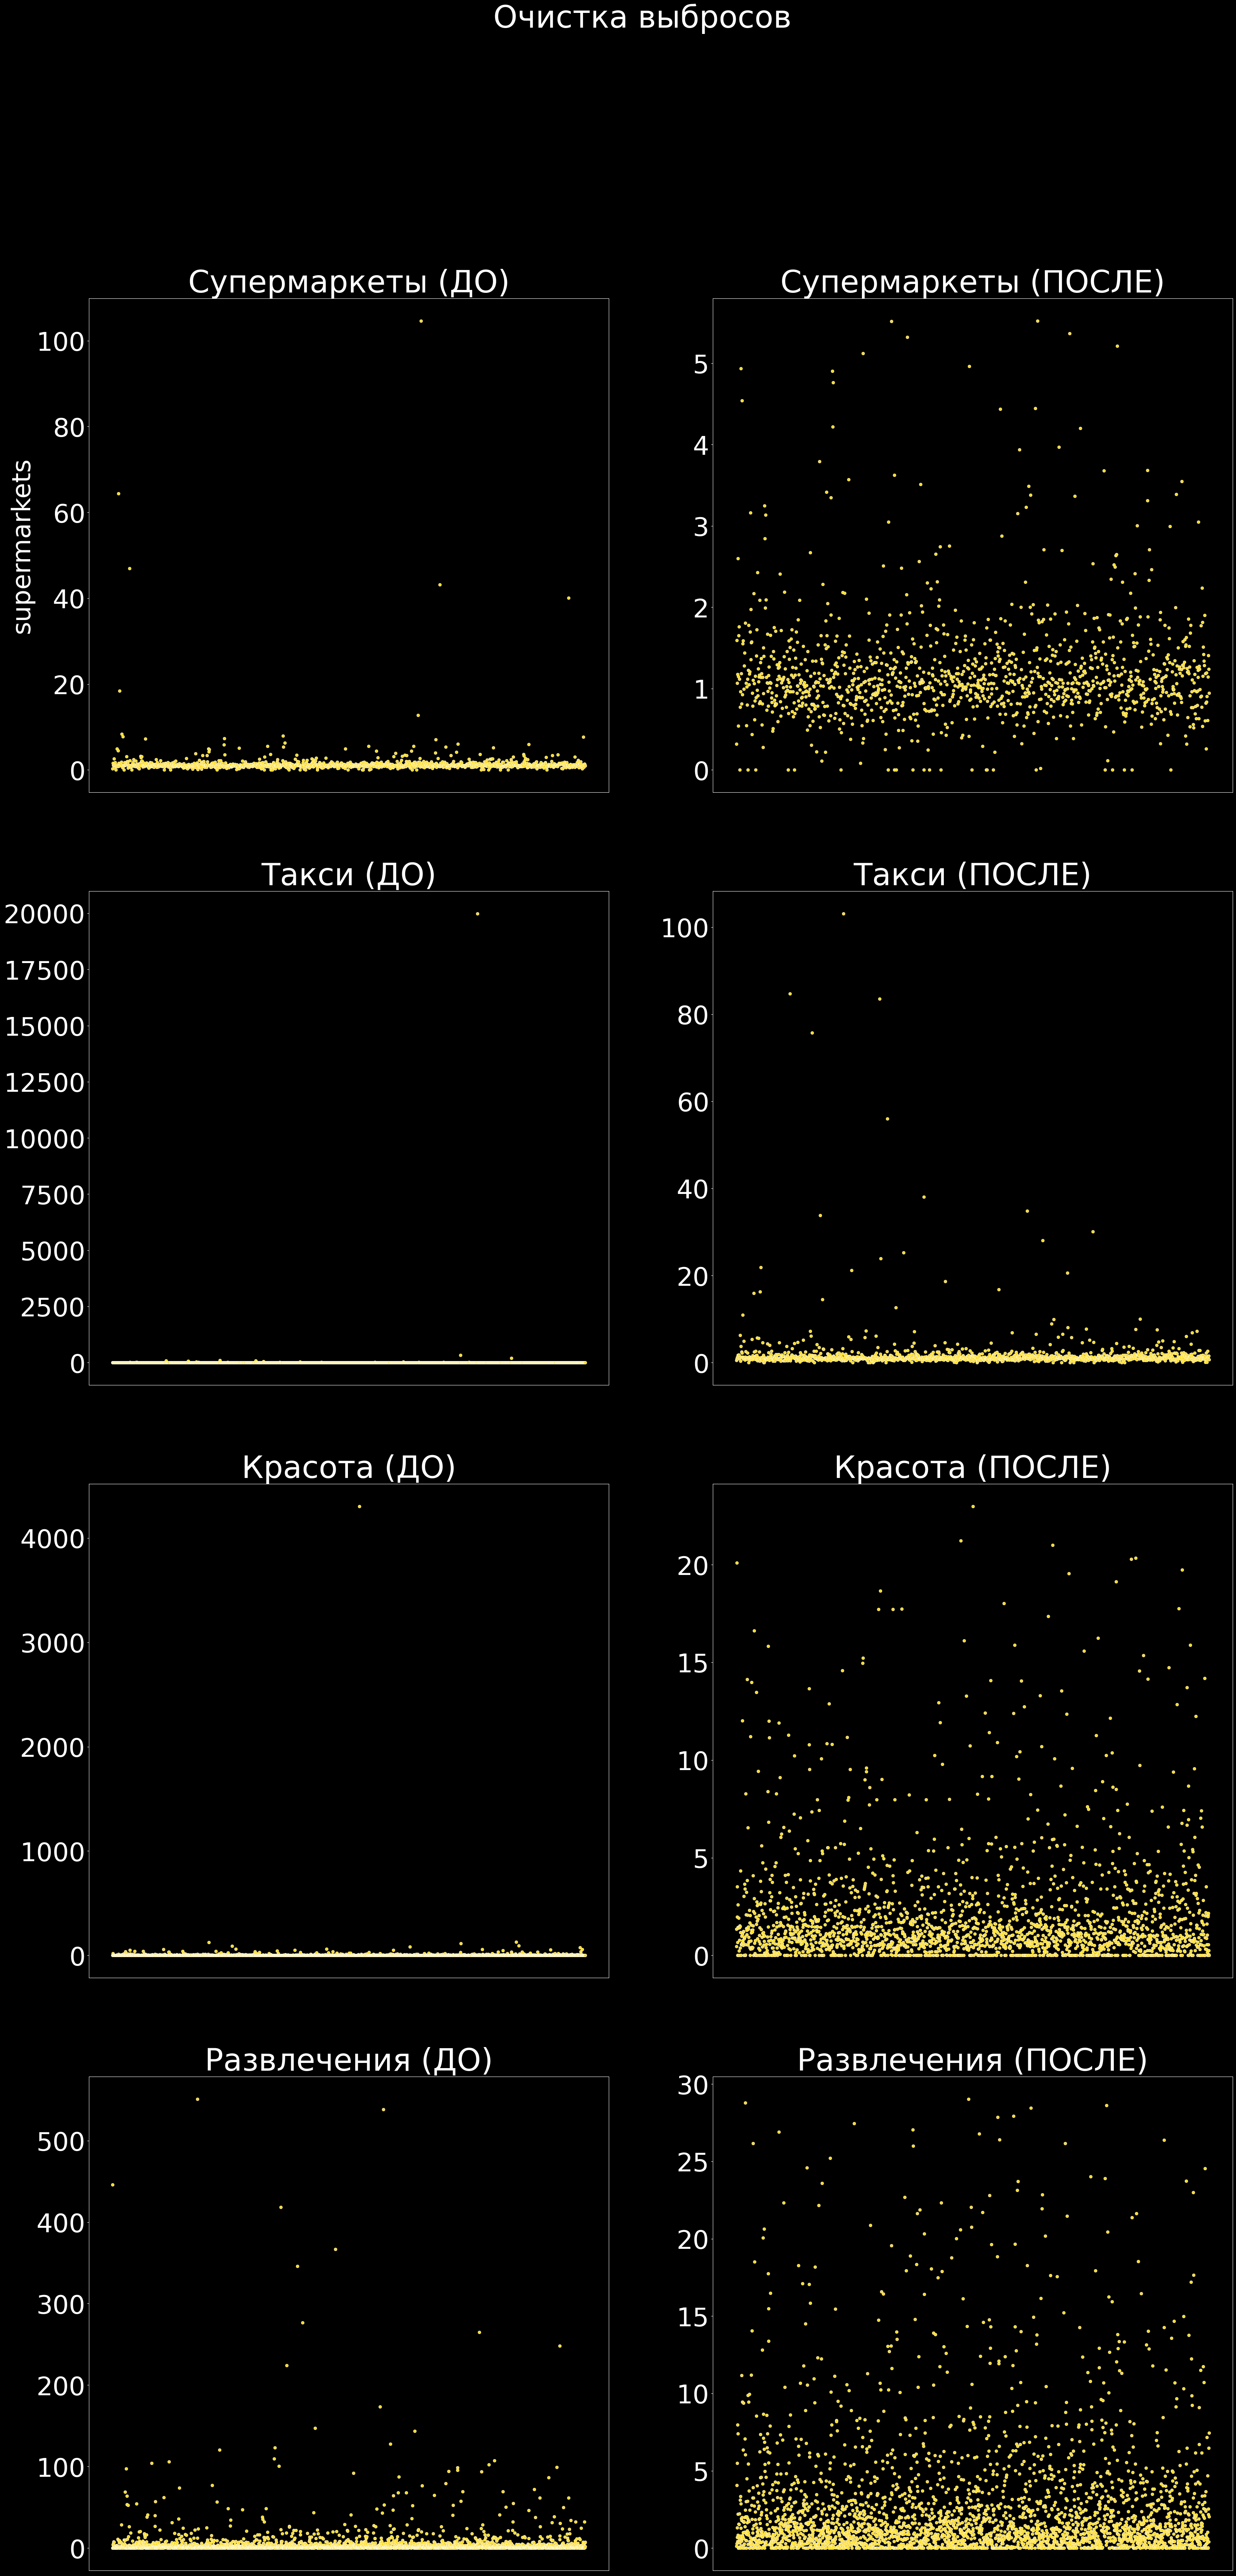

In [64]:
fig, axes = plt.subplots(4, 2, figsize=(40, 80))
rc = {'font.size' : 50}
plt.rcParams.update(rc)
fig.suptitle('Очистка выбросов')


supermarketMech = mechanism[4][z[4] <= 1]
sns.scatterplot(ax=axes[0, 0], data=mechanism[4], color='#FFDD2D')
axes[0, 0].set_title('Супермаркеты (ДО)')
axes[0, 0].set_xticks([])


sns.scatterplot(ax=axes[0, 1], data=supermarketMech, color='#FFDD2D')
axes[0, 1].set_title('Супермаркеты (ПОСЛЕ)')
axes[0, 1].set_xticks([])
# axes[0, 1].set_yticks([0, 1, 5, 10, 15, 20])
axes[0, 1].set_ylabel('')



taxiMech = mechanism[5][z[5] <= 0.3]
sns.scatterplot(ax=axes[1, 0], data=mechanism[5], color='#FFDD2D')
axes[1, 0].set_xticks([])
axes[1, 0].set_title('Такси (ДО)')
axes[1, 0].set_ylabel('')


sns.scatterplot(ax=axes[1, 1], data=taxiMech, color='#FFDD2D')
axes[1, 1].set_title('Такси (ПОСЛЕ)')
# axes[1, 1].set_yticks([0, 1, 5, 10, 15])
axes[1, 1].set_xticks([])
axes[1, 1].set_ylabel('')


beautyMech = mechanism[6][z[6] <= 0.2]
sns.scatterplot(ax=axes[2, 0], data=mechanism[6], color='#FFDD2D')
axes[2, 0].set_xticks([])
axes[2, 0].set_title('Красота (ДО)')
axes[2, 0].set_ylabel('')
print(len(beautyMech) / len(mechanism[6]))


sns.scatterplot(ax=axes[2, 1], data=beautyMech, color='#FFDD2D')
axes[2, 1].set_title('Красота (ПОСЛЕ)')
# axes[2, 1].set_yticks([0, 1, 5, 10, 15, 20, 25, 30])
axes[2, 1].set_xticks([])
axes[2, 1].set_ylabel('')


entertainmentMech = mechanism[7][z[7] <= 1]
sns.scatterplot(ax=axes[3, 0], data=mechanism[7], color='#FFDD2D')
axes[3, 0].set_xticks([])
axes[3, 0].set_title('Развлечения (ДО)')
axes[3, 0].set_ylabel('')


sns.scatterplot(ax=axes[3, 1], data=entertainmentMech, color='#FFDD2D')
axes[3, 1].set_title('Развлечения (ПОСЛЕ)')
# axes[3, 1].set_yticks([0, 10, 20, 40, 80])
axes[3, 1].set_xticks([])
axes[3, 1].set_ylabel('')

plt.show()
plt.close(fig)

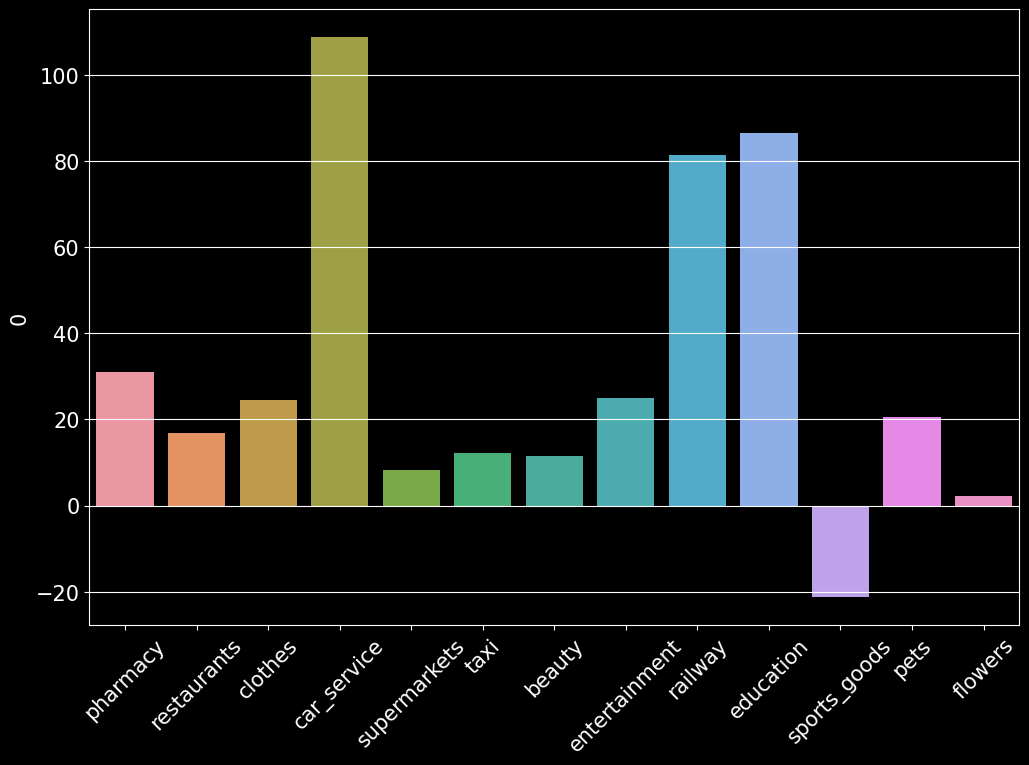

In [64]:
rc = {'figure.figsize':(12,8),
      'axes.grid' : True,
      'font.size' : 15}
plt.rcParams.update(rc)
plt.tight_layout()
mechBars = sns.barplot(x=mechanism.median().to_frame().index, y=mechanism.median().to_frame()[0], data=mechanism.median().to_frame(), errorbar=None)
mechBars.tick_params(axis='x', rotation=45)
plt.show()

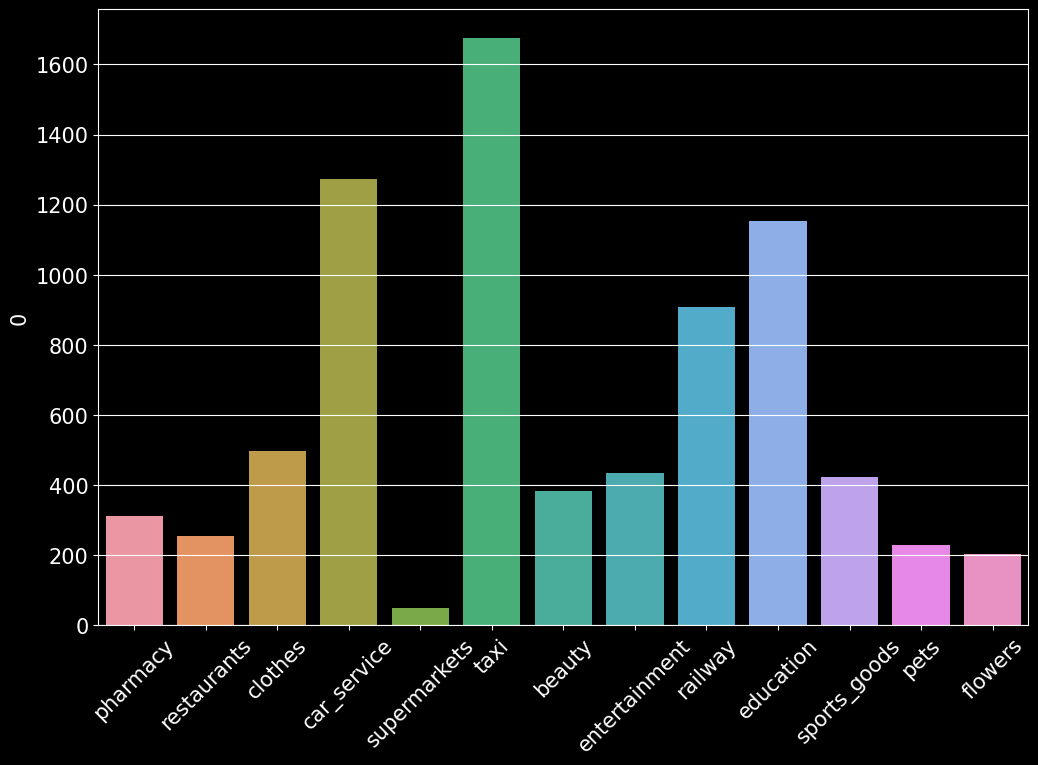

In [65]:
rc = {'figure.figsize':(12,8),
      'axes.grid' : True,
      'font.size' : 15}
plt.rcParams.update(rc)
plt.tight_layout()
mechBars = sns.barplot(x=mechanism.mean().to_frame().index, y=mechanism.mean().to_frame()[0], data=mechanism.mean().to_frame(), errorbar=None)
mechBars.tick_params(axis='x', rotation=45)
plt.show()

In [71]:
df_org = {'pharmacy': [],
         'restaurants': [],
         'clothes': [],
         'car_service': [], 
         'supermarkets': [],
         'taxi': [],
         'beauty': [],
         'entertainment': [],
          'railway': [],
          'education': [],
          'sports_goods': [],
          'pets': [],
          'flowers': [],
         'region': []}
mechanism = pd.DataFrame(df_org)

In [72]:
mechanism

,pharmacy,restaurants,clothes,car_service,supermarkets,taxi,beauty,entertainment,railway,education,sports_goods,pets,flowers,region


In [75]:
for i in range(17):
    if (len(data1[i]) >= 500):
        category = df.loc[df['client_id'].isin(data1[i])]
        for j in range(0, len(category), 6):
            new_row = {'pharmacy': 0,
                           'restaurants': 0,
                           'clothes': 0,
                           'car_service': 0, 
                           'supermarkets': 0,
                           'taxi': 0,
                           'beauty': 0,
                           'entertainment': 0,
                           'railway': 0,
                           'education': 0,
                           'sports_goods': 0,
                           'pets': 0,
                           'flowers': 0,
                           'region': 0}
            client = category.iloc[j:j + 6]
            active = client.loc[client[actCols[i]] == 1]
            notActive = client.loc[client[actCols[i]] == 0]
            active = active.loc[active['total'] > 0]
            notActive = notActive.loc[notActive['total'] > 0]
            activeCoeff = (active[payment[i]] / active['total']).mean()
            notActiveCoeff = (notActive[payment[i]] / notActive['total']).mean()
            if notActiveCoeff != 0:
                coeff = activeCoeff / notActiveCoeff * 100 - 100
                new_row[payment[i]] = coeff
                if client.iloc[0]['region'] == 'Москва':
                    new_row['region'] = 'Москва'
                else:
                    new_row['region'] = 'Другое'
            mechanism = mechanism.append(new_row, ignore_index=True)
mechanism

,pharmacy,restaurants,clothes,car_service,supermarkets,taxi,beauty,entertainment,railway,education,sports_goods,pets,flowers,region
0,14.412191,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Москва
1,0.000000,18.516666,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Москва
2,0.000000,0.000000,527.093222,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Другое
3,0.000000,0.000000,0.000000,147.36083,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Другое
4,0.000000,0.000000,0.000000,0.00000,-5.685235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Другое
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57014,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-24.808962,Другое
57015,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.000000,Другое
57016,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
57017,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,591.743445,Другое


In [ ]:
sns.barplot(penguins, x="island", y="body_mass_g", hue="sex")